## Q3a. image (30 marks)

### Background information

Question 3 is inspired by [Andy Warhol](https://www.britannica.com/biography/Andy-Warhol)'s repetitive painting in garish colours. Here are some examples of his art works:

* [Marilyn Diptych](https://en.wikipedia.org/wiki/Marilyn_Diptych)

<img src="../figs/marilyn_diptych.jpeg"/>

The painting was created using a promotional photograph of Marilyn Monroe and transferred onto silkscreen print using different colours. Original photo:

<img src="../figs/monroe_in_niagara.jpeg" width=100/>


* [Campbell's Soup Cans](https://en.wikipedia.org/wiki/Campbell%27s_Soup_Cans)


<img src="../figs/soup_cans.jpeg"/>

It consists of 32 canvases, each consisting of a painting of a Campbell's Soup can - one of each of the canned soup varieties the company offered at the time. The works were Warhol's hand-painted depictions of printed imagery deriving from commercial products and popular culture and belong to the pop art movement

(Information and all images are from Wikipedia)

Ultimately, we want to create a "painting" like the following via `NumPy` with only a few colours:

<img src="../figs/purple_soup.png" width=300/>

Using a photograph like the following:

<img src="../data/soup_can.jpg" width=100/>

---

### Images use in this question

We will make use of the two images stored in the `data` folder in the problem set repository:

* LSE image from `lse.jpg`:

<img src="../data/lse.jpg" width=300/>

* Soup can image from `soup_can.jpg`:

<img src="../data/soup_can.jpg" width=150/>

---

### Instructions

In part a, we work on some "simpler" parts and/or some simplified versions of the original problem:

1. (3 marks) Update the function `show()` in `image_util.py` so that it checks if the given argument is "non-empty 3d numpy ndarray with dtype np.uint8" as stated in the docstring. Raise appropriate types of exceptions if the preconditions are not satisfied. Your code should be added after the docstring and before the first line of code (i.e. before `dpi = 120`)

---

2. (6 marks) In `image_util.py`, write the function definition for the function `repetition()` to create an image with the given image repeated. 

    The function takes an image (non-empty 3d `np.ndarray` with dtype `np.uint8`), a positive integer (`m`) to represent the number of "rows" and a positive integer (`n`) to represent the number of "columns" the image repeated. The function returns a _new_ image (3d `np.ndarray` with dtype `np.uint8`) with the given image repeated $m \times n$ times. If the original 3d np.ndarray has the shape `(h, w, 3)`, the return 3d `np.ndarray` has the shape `(h*m, w*n, 3)`. 

    * Note: 
        * You can have a small number of iterations (e.g. iterate over `range(n)`), but no large number of iterations (e.g. iterate over each pixel of the given image) is needed
        * The image given as an argument should not be changed
    * Example usage:

    <img src="../figs/demo_repeat.png" width=1000/>

3. (10 marks) Write the function definition for the function `apply_simple_filter()` to replace the colour of a given image with the two given colours. 

    The function takes an image (non-empty 3d `np.ndarray` with dtype `np.uint8`), a 1d `np.ndarray` with dtype `np.uint8` with length 3 to represent the RGB of the first colour, and a 1d `np.ndarray` with dtype `np.uint8` with length 3 to represent the RGB of the second colour. 

    The function returns a _new_ image (3d `np.ndarray` with dtype `np.uint8`) that is similar to the original image and has the same size as it, but with the colours of the image replaced by the given colours. For each pixel, its colour is replaced by the closest out of the given two colours in terms of Euclidean distance, for which the formula is:

    $$ dist((x_1, y_1, z_1), (x_2, y_2, z_2)) = \sqrt{(x_1 - x_2)^2 + (y_1 - y_2)^2 + (z_1 - z_2)^2}$$

    The shape of the returned `np.ndarray` is the same as the given images. If there is a tie in terms of the distance, any of the closest colours can be used.

    * Illustrative example about calculating the distance and selecting the colour based on it: 
        * Suppose the first given colour has RGB(0, 1, 2), the second given colour has RGB(0, 180, 255), and the pixel of interest has RGB(214, 234, 248)
            * The distance between the pixel and the first given colour is:
            $$ dist((214, 234, 248),(0, 1, 2)) = \sqrt{(214 - 0)^2 + (234 - 1)^2 + (248 - 2)^2} = 400.75$$

            * The distance between the pixel and the second given colour is:
            $$ dist((214, 234, 248),(0, 180, 255)) = \sqrt{(214 - 0)^2 + (234 - 180)^2 + (248 - 255)^2} = 220.8$$

            * As the pixel is closer to the second given colour out of the 2 given colours, it will be replaced by the second given colour

    * Note: 
        * No loop is needed, or at most very small number of iterations is needed for this part of the question
         * The image given as an argument should not be changed

    * Example usage:

    <img src="../figs/demo_simple_filter.png" width=1000/>

    * Your implementation:

In [21]:
import numpy as np

def euclidean(array1, array2):
    return np.sqrt(np.sum(((array1 - array2) ** 2), axis=-1))

def apply_simple_filter(image, colour1, colour2):
    '''
    Takes an image and two colours, and applies a simple filter by replacing each image pixel with the most similar of the two filter colours.
    Args: image: 3d np.ndarray, first_colour: 1d np.ndarray, second_colour: 2d np.ndarray
    Returns image: 3d np.ndarray
    '''

    # Check all arrays are correct type and length
    assert isinstance(image, np.ndarray) and image.shape[-1] == 3 and image.dtype == np.uint8, "Invalid image format"
    assert isinstance(colour1, np.ndarray) and colour1.shape == (3,) and colour1.dtype == np.uint8, "Invalid colour1 format"
    assert isinstance(colour2, np.ndarray) and colour2.shape == (3,) and colour2.dtype == np.uint8, "Invalid colour2 format"

    # Convert all arrays out of uint8 to stop differences wrapping around 256
    colour1 = colour1.astype(np.float32)
    colour2= colour2.astype(np.float32)
    image = image.astype(np.float32)

    # Create difference maps between image and two colours
    dist_colour1 = euclidean(image, colour1)
    dist_colour2 = euclidean(image, colour2)

    # Create a bool array to split colours
    boolean_array = dist_colour1 <= dist_colour2

    # Create a blank image like input image
    result_image = np.zeros(image.shape, dtype=image.dtype)

    # Assemble the image
    result_image[boolean_array] = colour1
    result_image[~boolean_array] = colour2

    return result_image.astype(np.uint8)

4. (8 marks) Write the function definition for the function `apply_simple_filter_loop()` for which it takes the same arguments and returns the same value as `apply_simple_filter()`, but it iterates over each pixel instead of using vectorised operations when finding the colours to replace and replacing the colours. Call both `apply_simple_filter()` and `apply_simple_filter_loop()` with the same image (e.g. the lse image provided) as the argument and time the execution time (e.g. by using the module `time`, `datetime` or [`timeit`](https://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-timeit)). How is the execution time different?

Vectorised time: 0.11s
Iterative time: 13.2s


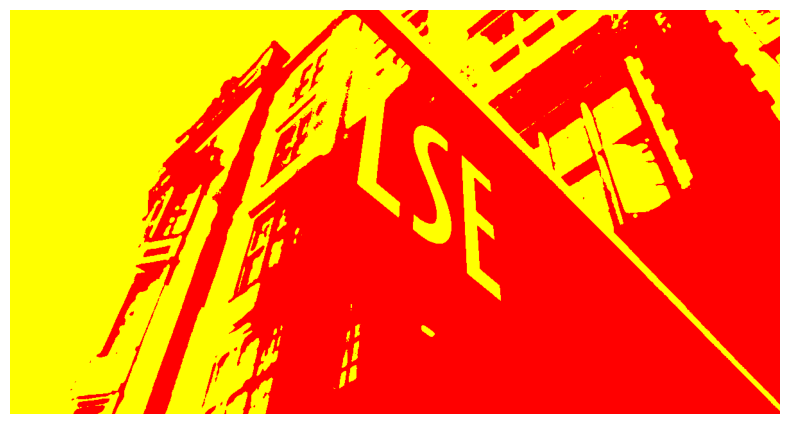

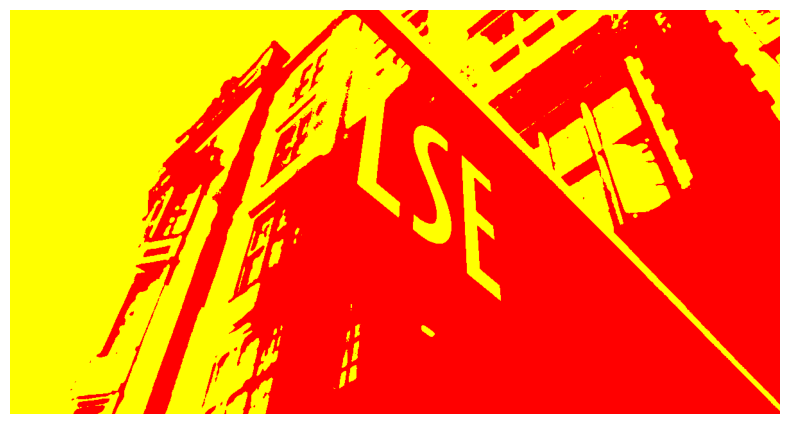

In [22]:
## please write the function definition for apply_simple_filter() here
import numpy as np
import time

def apply_simple_filter_loop(img, colour1, colour2):
    '''
    Replace the colours of a given image with the two given from Euclidean distance
    img: non-empty 3d numpy ndarray with dtype np.uint8

    colour1: RGB values of the first color
    colour2:  RGB values of the second color
    return: 3d numpy ndarray with dtype np.uint8
        new image with euclidean distance colours
    '''

    def euclidean_distance(pixel, colour): #colour has 3 dimensions r,g,b
        return np.sqrt(np.sum((pixel - colour) ** 2))

    def closest_colour(pixel):
        closeness_colour1 = euclidean_distance(pixel, colour1)
        closeness_colour2 = euclidean_distance(pixel, colour2)
        return colour1 if closeness_colour1 <= closeness_colour2 else colour2

    if colour1.shape != (3,):
        raise ValueError("colour 1 must be a 1d numpy array with length 3")

    if colour1.dtype != np.uint8:
        raise ValueError("colour 1 must have dtype np.uint8")

    if colour2.shape != (3,):
        raise ValueError("colour 2 must be a 1d numpy array with length 3")

    if colour2.dtype != np.uint8:
        raise ValueError("colour 2 must have dtype np.uint8")
        
    colour1 = colour1.astype(np.float32)
    colour2= colour2.astype(np.float32)
    img = img.astype(np.float32)

    modified_img = img.copy()

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            modified_img[i, j] = closest_colour(img[i, j])

    return modified_img.astype(np.uint8)


import image_util
lse = image_util.load('../data/lse.jpg')

vectorised_time1 = time.time()
filtered_lse = apply_simple_filter(lse, np.array([255,0,0], dtype=np.uint8), np.array([255,255,0], dtype=np.uint8))
vectorised_time2 = time.time()
rounded_time = round(vectorised_time2 - vectorised_time1, 2)
print(f"Vectorised time: {rounded_time}s")

iteration_time1 = time.time()
filtered_lse_loop = apply_simple_filter_loop(lse, np.array([255,0,0], dtype=np.uint8), np.array([255,255,0], dtype=np.uint8))
iteration_time2 = time.time()
iter_rounded_time = round(iteration_time2 - iteration_time1, 2)
print(f"Iterative time: {iter_rounded_time}s")
image_util.show(filtered_lse)
image_util.show(filtered_lse_loop)

(please put your textual answer for how the execution time is different here)

---

5. (3 marks) Please load in some images, apply functions written in parts 2 and 3 to the images, and display them

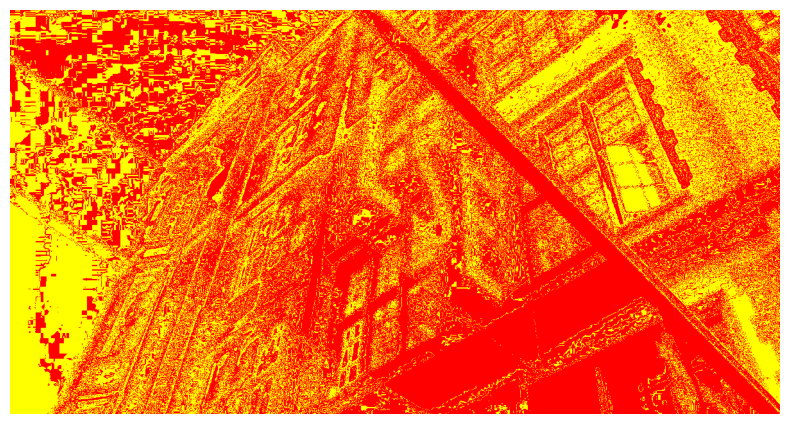

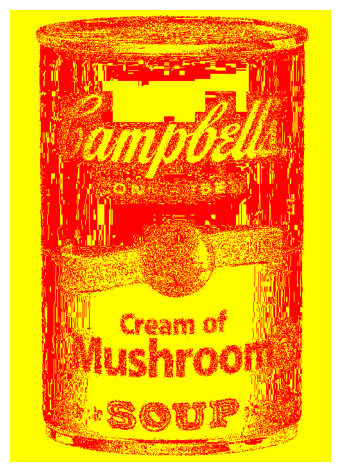

---

## Requirements

* You cannot use any modules and libraries (except `NumPy`) to answer this question
* This question is designed to assess your ability to manipulate `NumPy` array with vectorised operations and indexing/slicing - therefore, please use `NumPy` and vectorise operations _wherever appropriate and possible_, unless it is stated otherwise in the question
* You can only use functionalities from `NumPy` that have been demonstrated in the course (lecture, workshop, problem set 7), except it is stated otherwise in the question